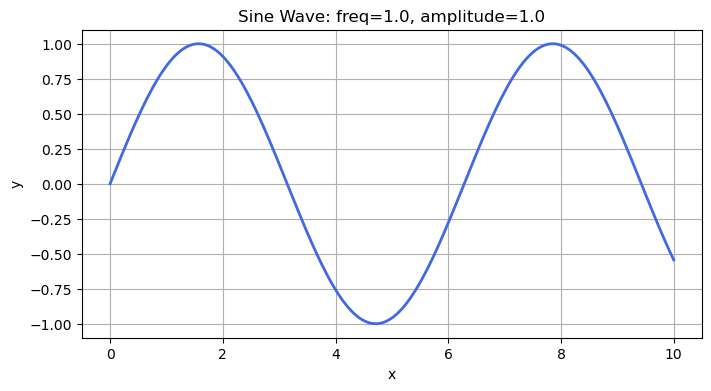

<function __main__.plot_func(freq=1.0, amplitude=1.0)>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Sample data
x = np.linspace(0, 10, 200)

# Function to plot based on parameters
def plot_func(freq=1.0, amplitude=1.0):
    y = amplitude * np.sin(freq * x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color="royalblue", lw=2)
    plt.title(f"Sine Wave: freq={freq}, amplitude={amplitude}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

# Create interactive sliders
interact(plot_func, freq=(0.5, 5.0, 0.1), amplitude=(0.5, 3.0, 0.1))


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, HBox, VBox, Dropdown, FloatSlider, Layout

# Sample data
x = np.linspace(0, 10, 400)

# Function to update all plots
def update_dashboard(freq=1.0, amplitude=1.0, wave_type='Sine'):
    plt.figure(figsize=(12, 6))
    
    # Select wave type
    if wave_type == 'Sine':
        y = amplitude * np.sin(freq * x)
    elif wave_type == 'Cosine':
        y = amplitude * np.cos(freq * x)
    elif wave_type == 'Tangent':
        y = amplitude * np.tan(freq * x)
        y[np.abs(y) > 5] = np.nan  # Limit tangent blow-up

    # --- Plot 1: Wave ---
    plt.subplot(2, 2, 1)
    plt.plot(x, y, color='royalblue', lw=2)
    plt.title(f'{wave_type} Wave')
    plt.grid(True)

    # --- Plot 2: Derivative ---
    plt.subplot(2, 2, 2)
    dy = np.gradient(y, x)
    plt.plot(x, dy, color='crimson', lw=2)
    plt.title(f'Derivative of {wave_type}')
    plt.grid(True)

    # --- Plot 3: Energy (y²) ---
    plt.subplot(2, 2, 3)
    plt.plot(x, y**2, color='seagreen', lw=2)
    plt.title('Energy (y²)')
    plt.grid(True)

    # --- Plot 4: Combined Waveforms ---
    plt.subplot(2, 2, 4)
    plt.plot(x, np.sin(freq*x), label='Sine', color='blue', alpha=0.6)
    plt.plot(x, np.cos(freq*x), label='Cosine', color='orange', alpha=0.6)
    plt.legend()
    plt.title('Sine vs Cosine')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Control panel
freq_slider = FloatSlider(value=1.0, min=0.5, max=5.0, step=0.1, description='Frequency:')
amp_slider = FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1, description='Amplitude:')
wave_dropdown = Dropdown(options=['Sine', 'Cosine', 'Tangent'], value='Sine', description='Wave Type:')

ui = VBox([wave_dropdown, HBox([freq_slider, amp_slider])])

# Connect controls to update function
dashboard = interactive(update_dashboard, freq=freq_slider, amplitude=amp_slider, wave_type=wave_dropdown)

display(ui, dashboard.output)


AttributeError: 'interactive' object has no attribute 'output'